In [1]:
# This cell imports libraries and loads the dataset for Summer Olympic medals, then shows a quick peek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load dataset (encoding provided)
file_path = 'D:/Downloads/Summer-Olympic-medals-1976-to-2008.csv'
df_olympics = pd.read_csv(file_path, encoding='ISO-8859-1')

# Basic info
print('Rows: ' + str(df_olympics.shape[0]))
print('Columns: ' + str(df_olympics.shape[1]))
print('Columns list:')
print(list(df_olympics.columns))

# Show head
print('Head:')
print(df_olympics.head())

Rows: 15433
Columns: 11
Columns list:
['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']
Head:
       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

In [2]:
print('Initial NA counts per column:')
print(df_olympics.isna().sum())

# Strip whitespace in string columns
str_cols = df_olympics.select_dtypes(include=['object']).columns
for c in str_cols:
    df_olympics[c] = df_olympics[c].astype(str).str.strip()

# Standardize Gender/Event_gender text
df_olympics['Gender'] = df_olympics['Gender'].replace({'Women':'Female','Men':'Male'})

# Ensure Year numeric
df_olympics['Year'] = pd.to_numeric(df_olympics['Year'], errors='coerce')

# Drop rows with missing critical fields
critical_cols = ['Year','Sport','Event','Athlete','Country','Medal','Gender']
df_clean = df_olympics.dropna(subset=critical_cols).copy()

# Create medal points for ranking (Gold 3, Silver 2, Bronze 1)
medal_map = {'Gold':3,'Silver':2,'Bronze':1}
df_clean['Medal_Points'] = df_clean['Medal'].map(medal_map)

print('After cleaning, rows: ' + str(df_clean.shape[0]))
print('Unique countries: ' + str(df_clean['Country'].nunique()))
print('Unique athletes: ' + str(df_clean['Athlete'].nunique()))
print('Years span: ' + str(int(df_clean['Year'].min())) + ' - ' + str(int(df_clean['Year'].max())))

# Summary statistics (counts by medal and gender)
summary_medals = df_clean['Medal'].value_counts().to_frame('count')
summary_gender = df_clean['Gender'].value_counts().to_frame('count')

print('Summary medals:')
print(summary_medals.head())
print('Summary gender:')
print(summary_gender.head())

Initial NA counts per column:
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64
After cleaning, rows: 15316
Unique countries: 127
Unique athletes: 11337
Years span: 1976 - 2008
Summary medals:
        count
Medal        
Bronze   5258
Gold     5042
Silver   5016
Summary gender:
        count
Gender       
Male     9388
Female   5928


Medals per year head:
     Year  Medal_Count
0  1976.0         1305
1  1980.0         1387
2  1984.0         1459
3  1988.0         1546
4  1992.0         1705


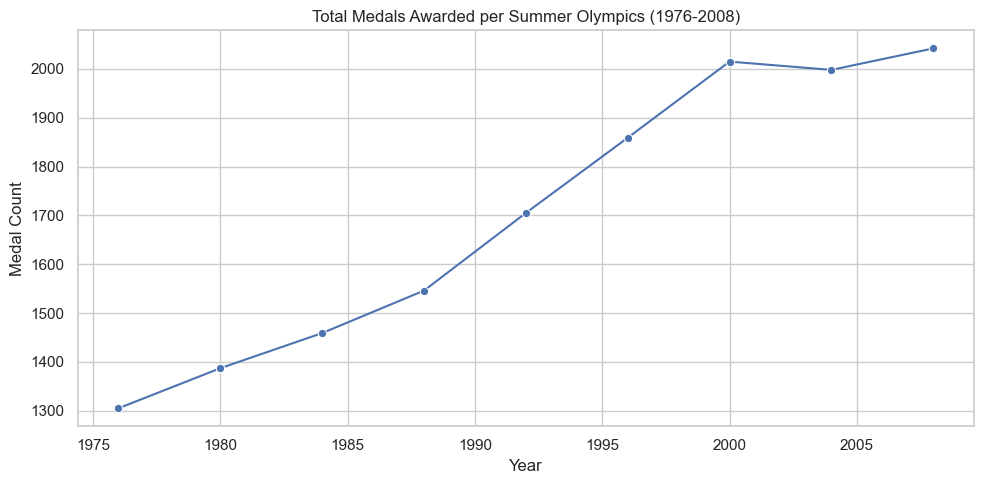

Top countries by medal points (top 15):
Country
United States     4431
Soviet Union      2184
Australia         1500
China             1399
East Germany      1388
Germany           1341
Russia            1228
Italy              939
Korea, South       920
Romania            909
United Kingdom     868
France             867
Netherlands        842
Cuba               762
Hungary            730
Name: Medal_Points, dtype: int64
Top countries by medal count (top 15):
Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Korea, South       454
France             449
Netherlands        428
Japan              388
Hungary            368
Name: count, dtype: int64


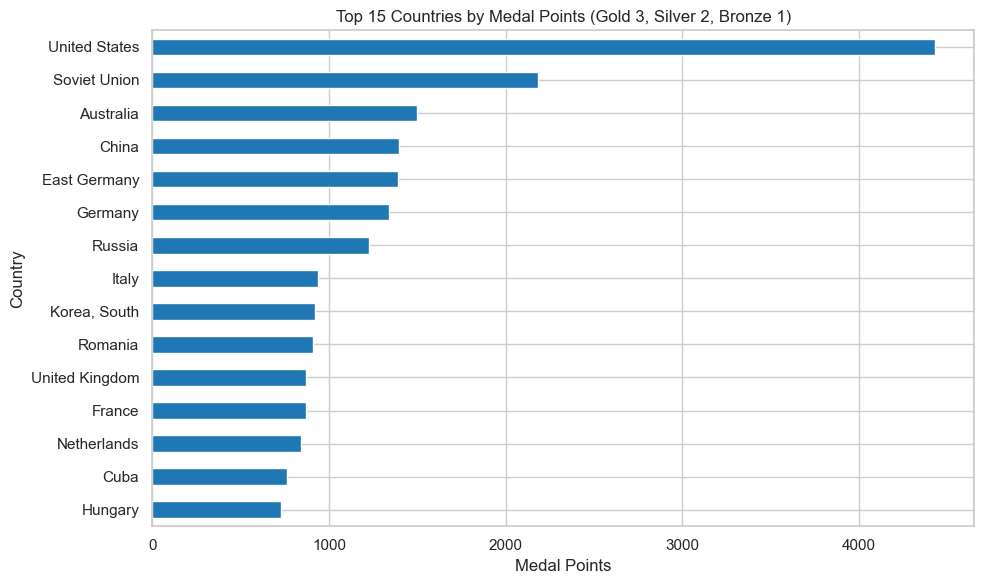

Top athletes by medal count (top 20):
Athlete
PHELPS, Michael           16
TORRES, Dara              12
THOMPSON, Jenny           12
FISCHER, Birgit           12
ANDRIANOV, Nikolay        12
NEMOV, Alexei             12
COUGHLIN, Natalie         11
BIONDI, Matthew           11
VAN ALMSICK, Franziska    10
LEWIS, Carl               10
SCHERBO, Vitaly           10
HALL, Gary Jr.            10
DITYATIN, Aleksandr       10
OTTEY-PAGE, Merlene        9
COMANECI, Nadia            9
THORPE, Ian                9
POPOV, Alexander           9
WERTH, Isabell             8
JONES, Leisel              8
THOMAS, Petria             8
Name: count, dtype: int64


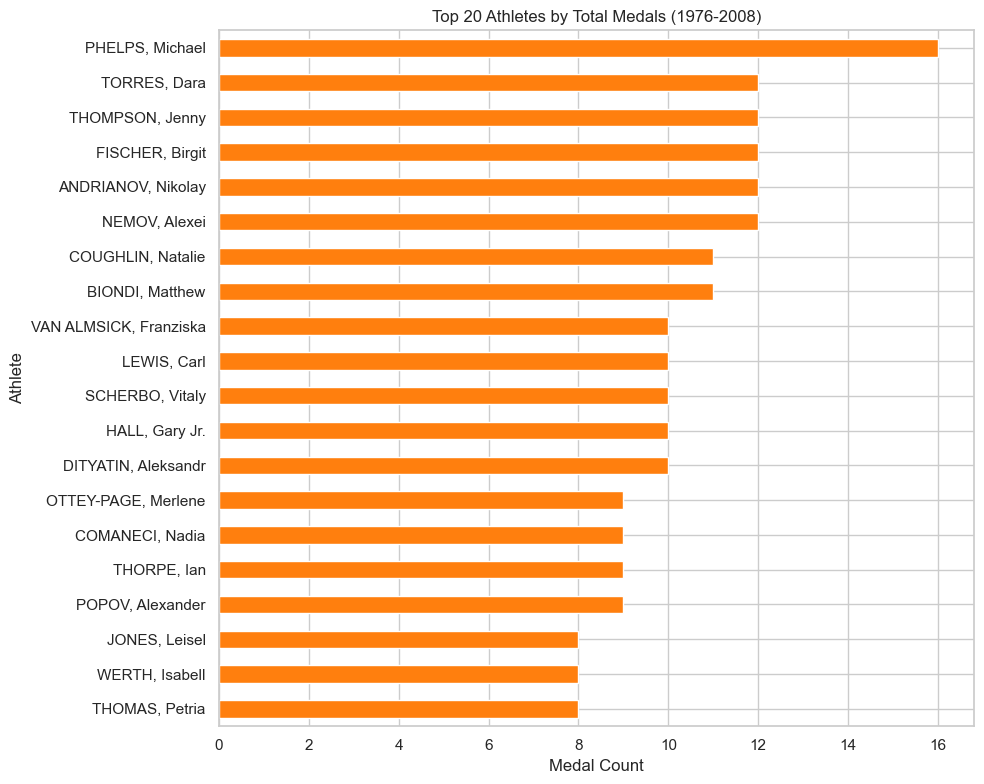

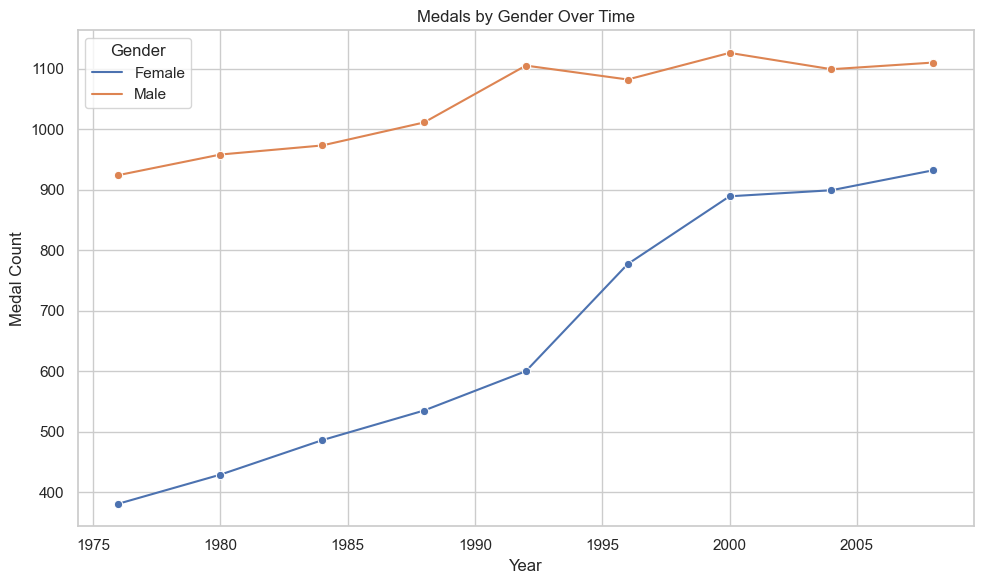

Top sports by medal count (top 12):
Sport
Aquatics         2210
Athletics        1523
Rowing           1377
Hockey            817
Gymnastics        783
Handball          780
Volleyball        695
Canoe / Kayak     672
Football          669
Basketball        646
Fencing           606
Wrestling         533
Name: count, dtype: int64


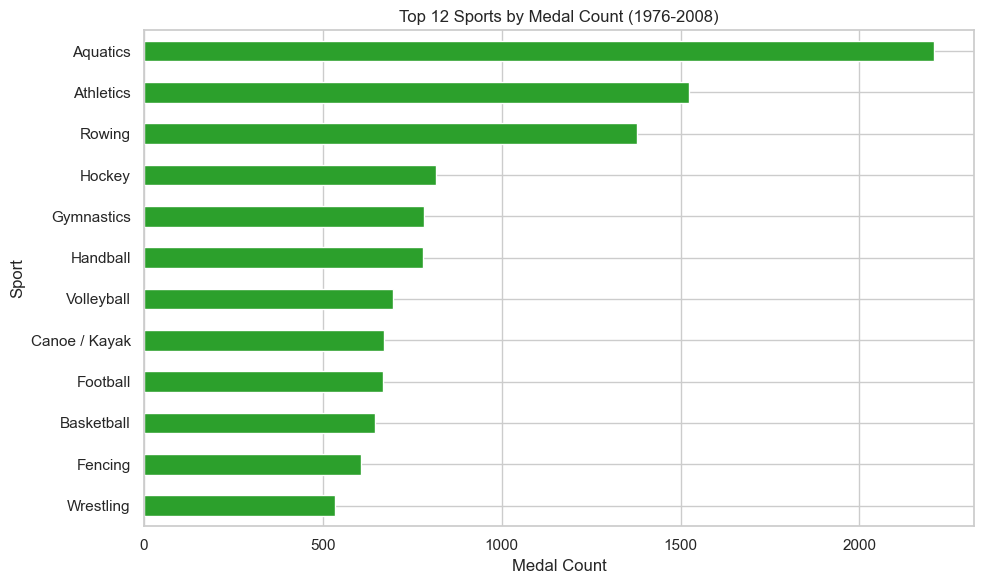

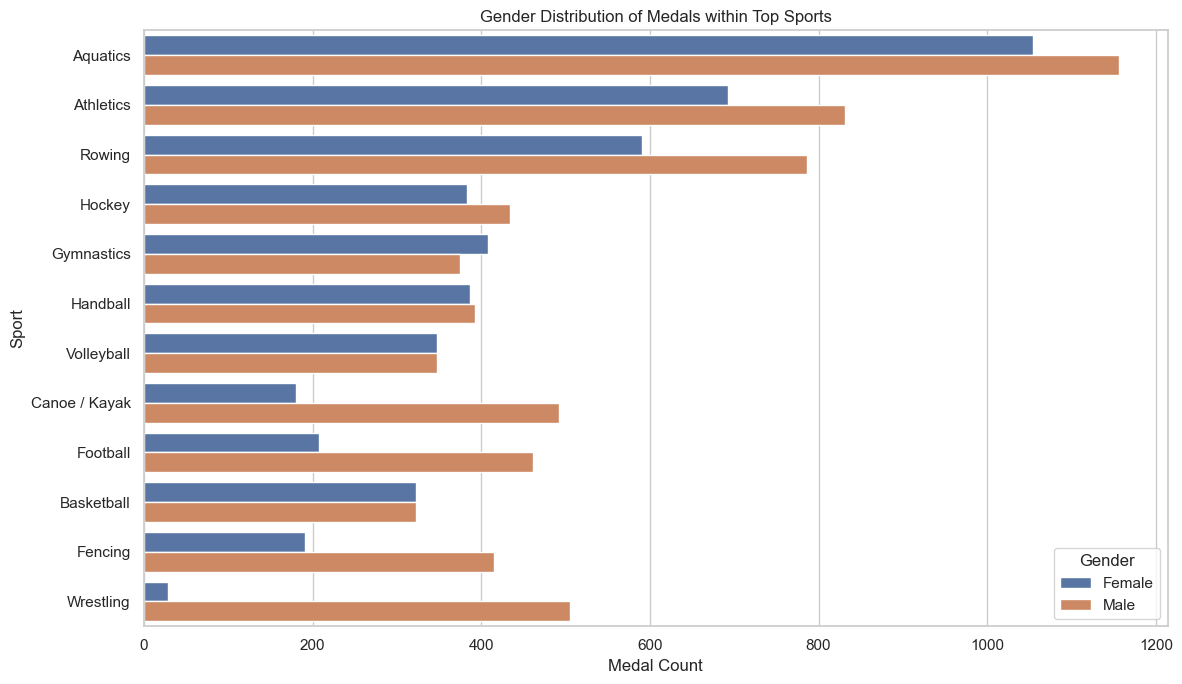

EDA complete: generated line and bar plots and key tables.


In [3]:
# Medals per year
medals_per_year = df_clean.groupby('Year')['Medal'].count().reset_index(name='Medal_Count')
print('Medals per year head:')
print(medals_per_year.head())

plt.figure(figsize=(10,5))
sns.lineplot(data=medals_per_year.sort_values('Year'), x='Year', y='Medal_Count', marker='o')
plt.title('Total Medals Awarded per Summer Olympics (1976-2008)')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.tight_layout()
plt.show()

# Top countries by medal points and counts
country_points = df_clean.groupby('Country')['Medal_Points'].sum().sort_values(ascending=False).head(15)
country_counts = df_clean['Country'].value_counts().head(15)
print('Top countries by medal points (top 15):')
print(country_points)
print('Top countries by medal count (top 15):')
print(country_counts)

plt.figure(figsize=(10,6))
country_points.sort_values().plot(kind='barh', color='#1f77b4')
plt.title('Top 15 Countries by Medal Points (Gold 3, Silver 2, Bronze 1)')
plt.xlabel('Medal Points')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Top athletes by total medals
athlete_counts = df_clean['Athlete'].value_counts().head(20)
print('Top athletes by medal count (top 20):')
print(athlete_counts)

plt.figure(figsize=(10,8))
athlete_counts.sort_values().plot(kind='barh', color='#ff7f0e')
plt.title('Top 20 Athletes by Total Medals (1976-2008)')
plt.xlabel('Medal Count')
plt.ylabel('Athlete')
plt.tight_layout()
plt.show()

# Gender distribution over time
gender_year = df_clean.groupby(['Year','Gender']).size().reset_index(name='Count')
plt.figure(figsize=(10,6))
sns.lineplot(data=gender_year.sort_values('Year'), x='Year', y='Count', hue='Gender', marker='o')
plt.title('Medals by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.tight_layout()
plt.show()

# Medal distribution by sport (top 12 sports)
sport_counts = df_clean['Sport'].value_counts().head(12)
print('Top sports by medal count (top 12):')
print(sport_counts)

plt.figure(figsize=(10,6))
sport_counts.sort_values().plot(kind='barh', color='#2ca02c')
plt.title('Top 12 Sports by Medal Count (1976-2008)')
plt.xlabel('Medal Count')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

# Gender distribution within top sports
top_sports = sport_counts.index.tolist()
sub = df_clean[df_clean['Sport'].isin(top_sports)]
plt.figure(figsize=(12,7))
sns.countplot(data=sub, y='Sport', hue='Gender', order=top_sports)
plt.title('Gender Distribution of Medals within Top Sports')
plt.xlabel('Medal Count')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

print('EDA complete: generated line and bar plots and key tables.')